<a href="https://colab.research.google.com/github/gchaewon/Euron5th_BusTayo/blob/main/EDA_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 날씨 데이터와 버스 승하차 인원 상관 관계 분석

  서울시 버스 승하차 인원 분석에서 월별 날씨가 영향을 미치는지 확인하기 위해 상관 관계 분석 진행

  승하차 인원 데이터는 23년 1월 ~ 12월 데이터를 사용함

In [2]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 0. 데이터 로딩

##1) 버스 데이터 로딩 1월 ~ 12월 데이터 불러옴 (전처리된 데이터에서 가져오기)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Euron/프로젝트/'

data_1to8 = pd.read_csv(path+'train.csv')

data_1to8 = data_1to8[data_1to8['month'].between(202301, 202308, inclusive='both')]

data_9to12 = pd.read_csv(path+'test.csv')

data = pd.concat([data_1to8, data_9to12], axis = 1)

In [5]:
data_1to8.shape

(301280, 21)

In [6]:
data_9to12.shape

(167250, 21)

In [7]:
data = pd.concat([data_1to8, data_9to12])

In [8]:
print(data.shape)
data

(468530, 21)


,month,bus_id,station_name,type,bus_station_ID,6~8_ride,6~8_takeoff,8~10_ride,8~10_takeoff,10~12_ride,...,12~14_ride,12~14_takeoff,14~16_ride,14~16_takeoff,16~18_ride,16~18_takeoff,18~20_ride,18~20_takeoff,20~22_ride,20~22_takeoff
149250,202301,741,종로2가사거리(00077),서울간선버스,77,649,362,934,691,821,...,613,728,515,622,618,646,571,756,534,788
149251,202301,470,종로2가사거리(00067),서울간선버스,67,752,330,1157,637,1109,...,866,649,842,603,933,606,950,723,807,842
149252,202301,100,창경궁.서울대학교병원(00031),서울간선버스,31,185,639,509,1281,578,...,345,676,243,492,234,430,204,444,225,458
149253,202301,104,창경궁.서울대학교병원(00024),서울간선버스,24,300,967,626,1790,673,...,445,813,337,476,269,416,238,450,214,500
149254,202301,171,창경궁.서울대학교병원(00012),서울간선버스,12,386,615,832,1604,985,...,724,764,549,333,480,271,432,278,524,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167245,202312,9404,구미동차고지(기점가상)(00001),서울광역버스,1,0,4,0,1,0,...,2,2,2,1,1,0,4,1,4,1
167246,202312,9404,구미동차고지(종점가상)(00060),서울광역버스,60,0,3,0,2,0,...,0,1,0,0,0,0,0,1,0,1
167247,202312,9707,가좌동종점(종점가상)(00078),서울광역버스,78,0,2,0,4,0,...,0,7,0,3,0,7,0,13,0,11
167248,202312,9701,가좌동종점(종점가상)(00127),서울광역버스,127,0,0,0,21,0,...,0,3,0,6,0,9,0,6,0,3


###2) 날씨 데이터 가져오기

서울시 월별 날씨 데이터

In [61]:
weather = pd.read_csv(path+'data/weather.csv', encoding='cp949')

weather = weather[12:23] # 23년 1월~12월 데이터만 추출

In [43]:
weather

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
12,\t\t108,서울,Jan.23,-1.5,3.2,12.5,2023.1.12,-5.7,-17.3,2023.1.25
13,\t\t108,서울,Feb.23,2.3,7.3,12.4,2023.2.27,-1.9,-5.3,2023.2.21
14,\t\t108,서울,Mar.23,9.8,16.2,25.1,2023.3.22,4.2,-1.9,2023.3.13
15,\t\t108,서울,Apr.23,13.8,19.0,28.4,2023.4.19,8.8,3.1,2023.4.8
16,\t\t108,서울,May.23,19.5,25.0,31.2,2023.5.16,14.6,7.9,2023.5.8
17,\t\t108,서울,Jun.23,23.4,27.9,34.0,2023.6.19,19.7,16.6,2023.6.3
18,\t\t108,서울,Jul.23,26.7,30.2,34.9,2023.7.30,23.9,21.6,2023.7.11
19,\t\t108,서울,Aug.23,27.2,30.8,35.8,2023.8.8,24.3,20.8,2023.8.28
20,\t\t108,서울,Sep.23,23.7,27.6,32.8,2023.9.5,20.2,15.2,2023.9.22
21,\t\t108,서울,Oct.23,15.8,21.0,24.6,2023.10.2,11.5,5.4,2023.10.22


### 불필요한 데이터 삭제 및 칼럼명 수정

In [62]:
weather.drop(['\t\t지점번호', '지점명'], axis=1, inplace=True)
weather.rename(columns={'\t최고기온일자': '최고기온일자'}, inplace=True)
weather['최고기온일자'] = weather['최고기온일자'].str.replace('\t', '')

weather

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
12,Jan.23,-1.5,3.2,12.5,2023.1.12,-5.7,-17.3,2023.1.25
13,Feb.23,2.3,7.3,12.4,2023.2.27,-1.9,-5.3,2023.2.21
14,Mar.23,9.8,16.2,25.1,2023.3.22,4.2,-1.9,2023.3.13
15,Apr.23,13.8,19.0,28.4,2023.4.19,8.8,3.1,2023.4.8
16,May.23,19.5,25.0,31.2,2023.5.16,14.6,7.9,2023.5.8
17,Jun.23,23.4,27.9,34.0,2023.6.19,19.7,16.6,2023.6.3
18,Jul.23,26.7,30.2,34.9,2023.7.30,23.9,21.6,2023.7.11
19,Aug.23,27.2,30.8,35.8,2023.8.8,24.3,20.8,2023.8.28
20,Sep.23,23.7,27.6,32.8,2023.9.5,20.2,15.2,2023.9.22
21,Oct.23,15.8,21.0,24.6,2023.10.2,11.5,5.4,2023.10.22


In [63]:
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
weather['월'] = weather['일시'].apply(lambda x: month_mapping.get(x.split('.')[0], None))

weather = weather.drop('일시', axis=1)
weather = weather[['월'] + [col for col in weather.columns if col != '월']]

weather

,월,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
12,1,-1.5,3.2,12.5,2023.1.12,-5.7,-17.3,2023.1.25
13,2,2.3,7.3,12.4,2023.2.27,-1.9,-5.3,2023.2.21
14,3,9.8,16.2,25.1,2023.3.22,4.2,-1.9,2023.3.13
15,4,13.8,19.0,28.4,2023.4.19,8.8,3.1,2023.4.8
16,5,19.5,25.0,31.2,2023.5.16,14.6,7.9,2023.5.8
17,6,23.4,27.9,34.0,2023.6.19,19.7,16.6,2023.6.3
18,7,26.7,30.2,34.9,2023.7.30,23.9,21.6,2023.7.11
19,8,27.2,30.8,35.8,2023.8.8,24.3,20.8,2023.8.28
20,9,23.7,27.6,32.8,2023.9.5,20.2,15.2,2023.9.22
21,10,15.8,21.0,24.6,2023.10.2,11.5,5.4,2023.10.22


## 1.  월별 평균 기온과 버스 승하차 인원 상관 관계

승하차 인원의 월별 추이를 평균 기온과 함께 확인

### 1) 승차 통계

In [12]:
ride_columns = ['month']
ride_columns += [col for col in data.columns if '_ride' in col]
ride = data[ride_columns]
ride.head(3)

,month,6~8_ride,8~10_ride,10~12_ride,12~14_ride,14~16_ride,16~18_ride,18~20_ride,20~22_ride
149250,202301,649,934,821,613,515,618,571,534
149251,202301,752,1157,1109,866,842,933,950,807
149252,202301,185,509,578,345,243,234,204,225


In [13]:
ride.tail(3)

,month,6~8_ride,8~10_ride,10~12_ride,12~14_ride,14~16_ride,16~18_ride,18~20_ride,20~22_ride
167247,202312,0,0,0,0,0,0,0,0
167248,202312,0,0,0,0,0,0,0,0
167249,202312,0,0,0,0,0,1,1,0


월을 기준으로 승차 인원을 합침

In [14]:
ride['total_ride'] = ride[['6~8_ride', '8~10_ride', '10~12_ride', '12~14_ride', '14~16_ride', '16~18_ride', '18~20_ride', '20~22_ride']].sum(axis=1)
ride_df = ride.drop(ride.columns.difference(['month', 'total_ride']), axis=1)
ride_df

,month,total_ride
149250,202301,5255
149251,202301,7416
149252,202301,2523
149253,202301,3102
149254,202301,4912
...,...,...
167245,202312,13
167246,202312,0
167247,202312,0
167248,202312,0


In [15]:
ride_df = ride_df.groupby('month')['total_ride'].sum().reset_index()

ride_df['month'] = ride_df['month'].astype(str).str[4:].astype(int)

In [48]:
weather.columns

Index(['월', '평균기온(℃)', '평균최고기온(℃)', '최고기온(℃)', '최고기온일자', '평균최저기온(℃)',
       '최저기온(℃)', '최저기온일자'],
      dtype='object')

In [50]:
mean_weather = weather[['월', '평균기온(℃)']]
mean_weather

,월,평균기온(℃)
12,1,-1.5
13,2,2.3
14,3,9.8
15,4,13.8
16,5,19.5
17,6,23.4
18,7,26.7
19,8,27.2
20,9,23.7
21,10,15.8


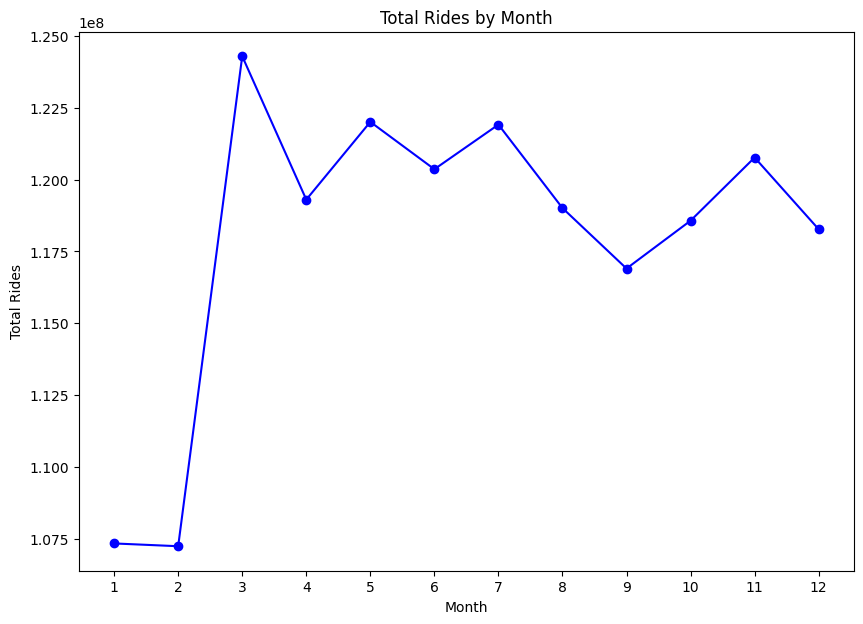

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(ride_df['month'], ride_df['total_ride'], marker='o', linestyle='-', color='b', label='Total Rides')

plt.xticks(range(1, 13, 1))
plt.title('Total Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')

plt.show()

### 2) 하차 통계

In [26]:
takeoff_columns = ['month']
takeoff_columns += [col for col in data.columns if '_takeoff' in col]
takeoff = data[takeoff_columns]
takeoff.head(3)

,month,6~8_takeoff,8~10_takeoff,10~12_takeoff,12~14_takeoff,14~16_takeoff,16~18_takeoff,18~20_takeoff,20~22_takeoff
149250,202301,362,691,792,728,622,646,756,788
149251,202301,330,637,730,649,603,606,723,842
149252,202301,639,1281,1251,676,492,430,444,458


In [27]:
takeoff['total_takeoff'] = takeoff[['6~8_takeoff', '8~10_takeoff', '10~12_takeoff', '12~14_takeoff', '14~16_takeoff', '16~18_takeoff', '18~20_takeoff', '20~22_takeoff']].sum(axis=1)
takeoff_df = takeoff.drop(takeoff.columns.difference(['month', 'total_takeoff']), axis=1)
takeoff_df

,month,total_takeoff
149250,202301,5385
149251,202301,5120
149252,202301,5671
149253,202301,7139
149254,202301,5900
...,...,...
167245,202312,12
167246,202312,11
167247,202312,55
167248,202312,71


In [28]:
takeoff_df = takeoff_df.groupby('month')['total_takeoff'].sum().reset_index()

takeoff_df['month'] = takeoff_df['month'].astype(str).str[4:].astype(int)

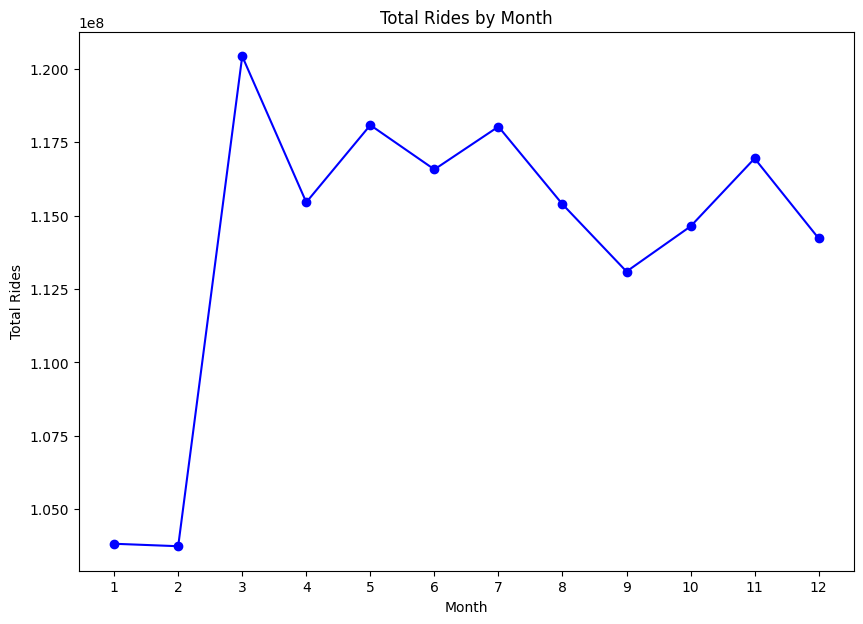

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(takeoff_df['month'], takeoff_df['total_takeoff'], marker='o', linestyle='-', color='b', label='Total Rides')

plt.xticks(range(1, 13, 1))
plt.title('Total Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')

plt.show()

### 3) 승하차와 날씨 상관 관계

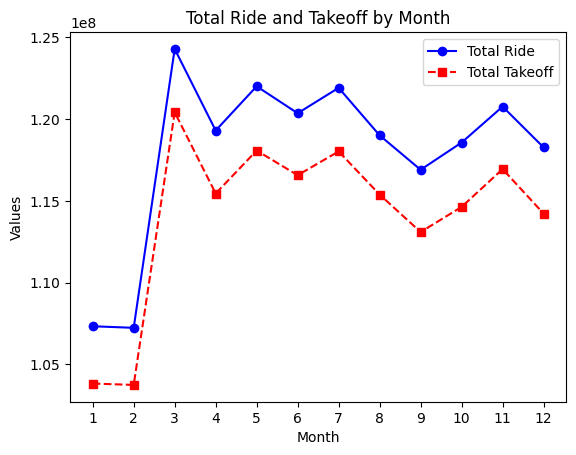

In [66]:
plt.plot(ride_df['month'], ride_df['total_ride'], marker='o', linestyle='-', color='b', label='Total Ride')
plt.plot(takeoff_df['month'], takeoff_df['total_takeoff'], marker='s', linestyle='--', color='r', label='Total Takeoff')
# plt.plot(weather['월'], weather['평균기온(℃)'], marker='s', linestyle='--', color='y', label='Total Takeoff')

plt.xticks(range(1, 13, 1))
plt.title('Total Ride and Takeoff by Month')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()

plt.show()